# Comparaison de tutormagic et nbtutor pour visualiser du code Python et C dans un notebook Jupyter

Je viens de découvrir ces deux projets très chousettes : [tutormagic](https://github.com/kikocorreoso/tutormagic/) et [nbtutor](https://github.com/lgpage/nbtutor), tous les deux lias bres, gratuits, en Python, et proposant d'intégrer des visualisations intéractives, venant ou inspirées du merveilleux [PythonTutor.com](http://pythontutor.com/).

### But : je souhaite savoir laquelle des deux extensions est la meilleure, et pour quels usages

- Peut-on utiliser l'un des deux en mode offline (sans une *iframe* vers PythonTutor) ? Je pense que non pour tutormagic, je pense que oui pour nbtutor.

- Est-ce que ça marche bien pour tous les types de Python de base : booléens/entiers/flottants, chaînes, objets, nombres complexes, tableau/`list`, dictionnaire/ensemble ? Probablement ! Réponse : oui !

- Et avec des tableaux numpy ? Probablement !. Réponse : oui pour `tutormagic` avec ma nouvelle version qui ajoute le mode "py3anaconda" (à voir si [cette PR](https://github.com/kikocorreoso/tutormagic/pull/11) est acceptée !)

- Et avec matplotlib ? Probablement pas. Réponse : avec `tutormagic` peut-être, tant qu'on ne génère pas de figure... avec `nbtutor` apparemment oui.
- Et avec *truc ésotérique* ? Probablement pas.. Réponse : probablement non ! Mais `tutormagic` en mode "py3anaconda" [supporte plein de modules scientifiques](https://docs.anaconda.com/anaconda/packages/old-pkg-lists/5.2.0/py2.7_linux-32/) puisque Anaconda 5.2 supporte plein de trucs : scipy, sympa, scikit-learn, et j'en passe !

### Attention ? Projets pas récents !

Jupyter a beaucoup changé ces dernières anneés, entre 2018 et 2021..

Mais ave jupyter classique, normalement ça va les "vieilles" extensions fonctionnent encore.
Jupyter Lab, c'est une autre histoire !

- [tutormagic](https://github.com/kikocorreoso/tutormagic/) n'a pas été mis à jour depuis 2017, probablement plus très fiable ! Et pas de documentation Sphinx sur ReadTheDocs, ça sent le projet assez expérimental. Mais c'est distribué proprement sur `pip`, et s'installe en une commande !
- [nbtutor](https://github.com/lgpage/nbtutor) n'a pas été mis à jour depuis 2016, probablement plus très fiable ?

### A propos de ce document

- C'est un [notebook Jupyter](https://jupyter.org/), écrit en [Python 3](https://www.python.org/) (mais j'expérimente avec le [Kernel C](https://github.com/brendan-rius/jupyter-c-kernel) plus bas) ;
- Auteur : [Lilian Besson](https://github.com/Naereen/notebooks) ;
- Date : 21/02/2021 ;
- License : [MIT](https://lbesson.mit-license.org/).

## Dépendances

Dans mon installation de Python 3, j'ai installé les deux paquets `tutormagic` et `nbtutor`

Où installer ?
- dans l'installation globale avec `sudo pip install` ;
- ou dans une installation locale dans un virtualenv ou pyenv ou autre, avec `pip install` (ou avec `conda install` mais pas testé).

In [1]:
%%bash
echo "Démonstration (pas exécutée)"
exit 0  # enlevez ça pour refaire ça chez vous

# tapez ça dans votre terminal
pip install tutormagic nbtutor
# si ça marche pas, rajoutez sudo
sudo pip install tutormagic nbtutor

# il faut manuellement installer et activer nbtutor
jupyter nbextension install --overwrite --py nbtutor
jupyter nbextension enable --py nbtutor

Démonstration (pas exécutée)


Et donc ce notebook peut déclarer ses dépendances :

In [5]:
%load_ext watermark

In [6]:
watermark -a "Lilian Besson (Naereen)" -p tutormagic,nbtutor,numpy,matplotlib

Lilian Besson (Naereen) 

tutormagic 0.3.0
nbtutor 1.0.4
numpy 1.19.2
matplotlib 3.3.2


## Première comparaison

In [4]:
test = "Démo de jupyter notebook"
print(test)

somme = 0
MAX_I = 10
for i in range(1, MAX_I):
    somme += i**3
print(f"Somme des {MAX_I} premiers cubes = {somme}")

Démo de jupyter notebook
Somme des 10 premiers cubes = 2025


### Un petit programme à tester avec les deux interfaces

Je vais emprunter le petit problème arithmético-algorithmique suivant, posé à mes élèves au début de février 2021 :

> Mini challenge algorithmique pour les passionnés en manque de petits exercices de code : (optionnel) Vous avez dû observer que ce mois de février est spécial parce que le 1er février est un lundi, et qu'il a exactement 4 lundis, 4 mardis, 4 mercredis, 4 jeudis, 4 vendredis, 4 samedis et 4 dimanches.
>
> Question : Comptez le nombre de mois de février répondant à ce critère (je n'ai pas trouvé de nom précis), depuis l'année de création de l'ENS Rennes (1994, enfin pour Cachan antenne Bretagne) jusqu'à 2077 (1994 et 2077 inclus).


Pour plus d'informations, cf [ce notebook](https://perso.crans.org/besson/notebooks/F%c3%a9vrier%202021%20un%20mini%20challenge%20arithm%c3%a9tico-algorithmique.html#R%C3%A9ponse-en-Python-(par-Lilian-Besson)) (aussi sur GitHub et nbviewer).

Avec le module calendar on pourrait faire comme en Bash : imprimer les calendriers, et rechercher des chaînes particulières... mais ce n'est pas très propre. Essayons avec ce même module mais en écrivant une solution fonctionnelle !

In [7]:
import calendar

def filter_annee(annee):
    return (
        set(calendar.Calendar(annee).itermonthdays2(annee, 2))
        & {(1,0), (28, 6), (29, 0)}
    ) == {(1, 0), (28, 6)}

filter_annee(2020), filter_annee(2021), filter_annee(2022)

(False, True, False)

C'est un bon exemple car il utilise des listes, des ensembles etc.
Peut-être restreindre le nombre d'année considérées, pour simplifier ?

Et donc on a juste à compter les années, de 1994 à 2077 inclus, qui ne sont pas des années bissextiles et qui satisfont le filtre :

In [8]:
%%time
len(list(filter(filter_annee, ( annee
        for annee in range(1994, 2077 + 1)
        # if not calendar.isleap(annee) # en fait c'est inutile
    )
)))

CPU times: user 1.16 ms, sys: 696 µs, total: 1.85 ms
Wall time: 1.87 ms


9

### Avec `tutormagic`

Je suis le tutoriel présent [sur la documentation](https://github.com/kikocorreoso/tutormagic/).

In [9]:
%load_ext tutormagic

The tutormagic extension is already loaded. To reload it, use:
  %reload_ext tutormagic


In [10]:
%%tutor --lang python3 --height 500

URL = "http://PythonTutor.com"
test = "Démo de tutormagic"
explication = f"avec un iframe vers {URL}"
print(test, explication)

somme = 0
MAX_I = 10
for i in range(1, MAX_I):
    somme += i**3
print(f"Somme des {MAX_I} premiers cubes = {somme}")

Ca marche bien pour ce petit exemple !

Essayons plus solide :

In [11]:
%%tutor --lang python3 --run --height 500 --curInstr 11

import calendar

def filter_annee(annee):
    return (
        set(calendar.Calendar(annee).itermonthdays2(annee, 2))
        & {(1,0), (28, 6), (29, 0)}
    ) == {(1, 0), (28, 6)}

nb_bonnes_annees = len(list(filter(filter_annee, ( annee
        for annee in range(1994, 2077 + 1)
        # if not calendar.isleap(annee) # en fait c'est inutile
    )
)))

Whooo! Ca a pris 763 étapes, on était pas loin de la limite des 1000 étapes sur PythonTutor.com, mais ça marche !

Ca marche **vraiment bien** !

En repliant le code (avec une extension, [Codefolding](https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/nbextensions/codefolding/readme.html)), on peut montrer juste le début (la "magic" `%%tutor`) et l'iframe !

Bonus : ça fonctionne si on ferme le notebook et qu'on le rouvre, sans même avoir à réexécuter la cellule !
Très pratique pour préparer son cours !

### Avec `nbtutor`

Je suis aussi la documentation sur [la page GitHub de nbtutor](https://github.com/lgpage/nbtutor).

In [1]:
%reload_ext nbtutor

Ca semble bien chargé, essayons !

In [12]:
%%nbtutor --reset --force --debug

explication = "Démo de nbtutor, normalement sans iframe vers PythonTutor.com"
print(explication)

somme = 0
MAX_I = 10
for i in range(1, MAX_I):
    somme += i**3
print(f"Somme des {MAX_I} premiers cubes = {somme}")

Démo de nbtutor, normalement sans iframe vers PythonTutor.com
Somme des 10 premiers cubes = 2025


~~Ca marche pas :(~~ Apparemment ça marche pas bien si tutormagic a aussi été exécuté...

Je vois sur la documentation du projet que l'installation de l'extension ajoute une "barre d'outil de cellule", ~~mais je ne l'ai pas~~... je l'ai désormais, en rechargeant le notebook !

Elle prend la place de la barre d'outil pour les [slides RISE](https://rise.readthedocs.io/en/stable/), mais ce n'est pas grave, on peut passer de l'un à l'autre.

Je rencontre le même problème que [ce ticket](https://github.com/lgpage/nbtutor/issues/29).

Essayons de comprendre ce problème de nbtutor !!

In [14]:
!pip show nbtutor

Name: nbtutor
Version: 1.0.4
Summary: Visualize Python code execution in Jupyter Notebook cells
Home-page: https://github.com/lgpage/nbtutor
Author: Logan Page
Author-email: page.lg@gmail.com
License: BSD 3-Clause
Location: /usr/local/lib/python3.6/dist-packages
Requires: notebook
Required-by: 


In [15]:
!jupyter-nbextension list 2>&1 | grep -A 2 nbtutor

      nbtutor/js/nbtutor.min  enabled 
      - Validating: OK
    tree section


Bon, le package semble installé, et ajouté comme une extension Jupyter, qui le reconnaît et la valide...

Chargez l'extension avec `%load_ext nbtutor` a fonctionné... juste la magic `%%nbtutor` ne marche pas.

In [16]:
%%nbtutor?

Sa documentation se charge bien !

```
Docstring:
::

  %nbtutor [-r] [-f] [-i] [-d N] [--digits D] [--max_size S] [--step_all]
               [--expand_arrays] [--nolies] [--debug]
```

Mais rien ne se passe ! Même en mode `--debug`...

In [3]:
%%nbtutor --reset --force --debug

x = sum([i**3 for i in range(1, 10)])
print(x)

Aucun message d'erreur, rien dans la console qui a lancé Jupyter...

Je pense que l'extension est cassée avec les nouvelles variantes de Python ou de Jupyter, qui comme je le suspectais a beaucoup changé depuis 2016 (dernier commit de ce projet)...

J'ai demandé au développeur [s'il maintenait encore son projet](https://github.com/lgpage/nbtutor/issues/41).

Et pour l'exemple plus gros :

In [13]:
%%nbtutor --reset --force

import calendar

def filter_annee(annee):
    return (
        set(calendar.Calendar(annee).itermonthdays2(annee, 2))
        & {(1,0), (28, 6), (29, 0)}
    ) == {(1, 0), (28, 6)}

nb_bonnes_annees = len(list(filter(filter_annee, ( annee
        for annee in range(1994, 2077 + 1)
        # if not calendar.isleap(annee) # en fait c'est inutile
    )
)))

Ca marche ! Wooo!

---
## Avec numpy et matplotlib ?

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

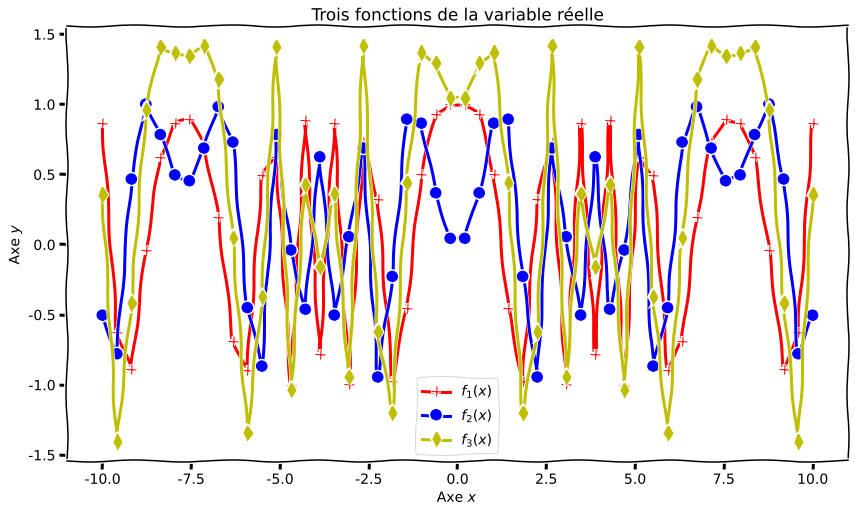

In [16]:
X = np.linspace(-10, 10)

def f1(x): return np.cos(x**2)
def f2(x): return np.sin(x**2)
def f3(x): return f1(x)+f2(x) 
Y1 = f1(X)
Y2 = f2(X)
Y3 = f3(X)

# avec la police "Humour Sans", téléchargée depuis https://aur.archlinux.org/packages/ttf-humor-sans/
with plt.xkcd():
    plt.figure(figsize=(14,8))
    plt.plot(X, Y1, "+-r", label="$f_1(x)$", ms=10, lw=3)
    plt.plot(X, Y2, "o-b", label="$f_2(x)$", ms=10, lw=3)
    plt.plot(X, Y3, "d-y", label="$f_3(x)$", ms=10, lw=3)
    plt.legend()
    plt.xlabel("Axe $x$")
    plt.ylabel("Axe $y$")
    plt.title("Trois fonctions de la variable réelle")
    plt.show()

### Avec `tutormagic` ?

In [51]:
%%tutor --lang python3 --height 100

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X = np.linspace(-10, 10)

def f1(x): return np.cos(x**2)
def f2(x): return np.sin(x**2)
def f3(x): return f1(x)+f2(x) 
Y1 = f1(X)
Y2 = f2(X)
Y3 = f3(X)

with plt.xkcd():
    plt.figure(figsize=(14,8))
    plt.plot(X, Y1, "+-r", label="$f_1(x)$", ms=10, lw=3)
    plt.plot(X, Y2, "o-b", label="$f_2(x)$", ms=10, lw=3)
    plt.plot(X, Y3, "d-y", label="$f_3(x)$", ms=10, lw=3)
    plt.legend()
    plt.xlabel("Axe $x$")
    plt.ylabel("Axe $y$")
    plt.title("Trois fonctions de la variable réelle")
    plt.show()

Ici, le problème vient de la "cell magic" `%matplotlib` en ligne 4 !

Et si on essaie sans cette cell magic ?

In [52]:
%%tutor --lang python3 --height 500

import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-10, 10)

def f1(x): return np.cos(x**2)
def f2(x): return np.sin(x**2)
def f3(x): return f1(x)+f2(x) 
Y1 = f1(X)
Y2 = f2(X)
Y3 = f3(X)

print(Y1)
print(Y2)
print(Y3)

Evidemment, ça ne marche pas ! Numpy et matplotlib ne sont PAS supportés dans PythonTutor.com...

Seul les modules suivants sont disponibles avec le mode "Python3" basique :

    Only these modules can be imported:
    __future__, abc, array, bisect, calendar, cmath,
    collections, copy, datetime, decimal, doctest, fractions,
    functools, hashlib, heapq, io, itertools, json,
    locale, math, operator, pickle, pprint, random,
    re, string, time, types, typing, unittest

> Ca allait être un avantage de nbtutor... au moins la partie numpy.

Bon, et bien on peut essayer "Python 3.6 with Anaconda (experimental)".

Depuis le site web, j'arrive à utiliser Python 3.6 + Anaconda 5.2 EXPERIMENTAL! pour le code suivant.

In [18]:
%%tutor --lang py3anaconda --height 500

import numpy as np

X = np.linspace(-10, 10)

def f1(x): return np.cos(x**2)
def f2(x): return np.sin(x**2)
def f3(x): return f1(x)+f2(x) 
Y1 = f1(X)
Y2 = f2(X)
Y3 = f3(X)

print(Y1)
print(Y2)
print(Y3)

ValueError: py33anaconda not supported. Only the following options are allowed: 'python2', 'python3', 'java', 'javascript', 'typescript', 'ruby', 'c', 'c++', 'py3anaconda'

Ah zut, pour l'instant la magic cell `%%tutor` ne connaît pas d'autres modes pour Python 3.
En effet elle date de 2017, mais le nouveau mode de PythonTutor est plus récent !

J'ai ouvert [ce ticket](https://github.com/kikocorreoso/tutormagic/issues/10) pour suggérer le support de ce nouveau mode ! Et [cette PR](https://github.com/kikocorreoso/tutormagic/pull/11)

In [19]:
%%tutor --lang py3anaconda --height 500
# https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html

x = 4
print("Hello world!" * x)

import numpy as np

I = np.sqrt(2/np.pi)*(18.0/27*np.sqrt(2)*np.cos(4.5) - 4.0/27*np.sqrt(2)*np.sin(4.5))

print(I)

import scipy.integrate as integrate
import scipy.special as special
result = integrate.quad(lambda x: special.jv(2.5,x), 0, 4.5)
print(result)

I += np.sqrt(2*np.pi) * special.fresnel(3/np.sqrt(np.pi))[0]
print(I)

print(abs(result[0]-I))


POUF ça marche, merci à ma [petite modification (trois lignes changées)](https://github.com/kikocorreoso/tutormagic/pull/11).

> C'est quand même beau les logiciels open-source...

### Une remarque en passant : avoir PythonTutor offline? semble possible !

Au fait, [PythonTutor n'est plus libre](https://github.com/pgbovine/OnlinePythonTutor/), mais [un fork récent existe](https://github.com/seamile/PyTutor) : c'est peut-être un vol de propriété intellectuelle, mais bon, ça peut dépanner !

TODO: l'installer chez moi, et faire en sorte que tutormagic fonctionne en local aussi ! Regardez [ce ticket](https://github.com/kikocorreoso/tutormagic/issues/8) assez récent, mais pas avancé (mais très détaillé), et [celui là sur un clone de PythonTutor](https://github.com/seamile/PyTutor/issues/4).

=> J'ai réussi à avoir PyTutor (v5-unity) mais juste pour Python3... pas C ou Java... et je sais pas comment faire !

### Avec `nbtutor` ?

In [16]:
%%nbtutor --reset --force --debug

import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-10, 10, 40)

def f1(x): return np.cos(x**2)
def f2(x): return np.sin(x**2)
def f3(x): return f1(x)+f2(x) 
Y1 = f1(X)
Y2 = f2(X)
Y3 = f3(X)

with plt.xkcd():
    plt.figure(figsize=(14,8))
    plt.plot(X, Y1, "+-r", label="$f_1(x)$", ms=10, lw=3)
    #plt.plot(X, Y2, "o-b", label="$f_2(x)$", ms=10, lw=3)
    #plt.plot(X, Y3, "d-y", label="$f_3(x)$", ms=10, lw=3)
    plt.legend()
    #plt.xlabel("Axe $x$")
    #plt.ylabel("Axe $y$")
    plt.title("Trois fonctions de la variable réelle")
    plt.show()

BdbQuit: 

Je suspectais que ça n'allait pas marcher avec nbtutor ~~puisque ça ne marchait pas avant !!~~ puisque nbtutor a les mêmes limitations que tutormagic !

Mais ça marche pour du numpy pur !

Et ça marche aussi pour des petits codes utilisant Matplotlib, mais très vite mon CPU prend 100%, ça rame, je ne vais pas chercher davantage.

In [25]:
%%nbtutor --reset --force

import numpy as np

X = np.linspace(-10, 10, 400)

def f1(x): return np.cos(x**2)
def f2(x): return np.sin(x**2)
def f3(x): return f1(x)+f2(x) 
Y1 = f1(X)
Y2 = f2(X)
Y3 = f3(X)
Y = [Y1, Y2, Y3]

for i, y in enumerate(Y):
    for f in [np.min, np.max, np.mean]:
        name_f = str(f.__name__)
        print(f"{name_f} of Y{i+1}, result = {f(y)}")

Cet exemple fonctionne !

---
## Et pour exécuter du code C ??

Je vais écrire un programme C qui fait un petit truc intéressant, et essayer les choses suivantes :

- l'exécuter depuis ce notebook, avec le kernel [jupyter-c-kernel](https://github.com/brendan-rius/jupyter-c-kernel) ;
- essayer `tutormagic` ! Je pense que ça devrait fonctionner, car c'est une *iframe* vers [PythonTutor.com, qui supporte le C](http://pythontutor.com/c.html) (version C11 ou C17) avec gcc ;
- essayer `nbtutor` ! Si ça marche, c'est que ça utilise le serveur PythonTutor sans le montrer, sinon ça ne devrait pas marcher.

### Exemple de programme C

In [4]:
/* Cette cellule est écrite en langage C, il ne faut pas l'exécuter avec le kernel Python */
/* Installez le kernel https://github.com/brendan-rius/jupyter-c-kernel */

#include <stdio.h>
#define MIN_I 1
#define MAX_I 10
#define MIN_POWER 1
#define MAX_POWER 5

unsigned long power(int n, unsigned long acc, unsigned long x) {
    if (n == 0) { return acc; }
    if (n % 2 == 0) { return power(n/2, acc, x*x); }
    else { return power((n-1)/2, acc * x, x*x); }
}

int main(void) {
    for (int i = MIN_I; i <= MAX_I; i++) {
        printf("\n- Pour i = %i :", i);
        for (int n = MIN_POWER; n <= MAX_POWER; ++n) {
            printf("\n\ti^%i = %li", n, power(n, 1, i));
        }
    }
}


- Pour i = 1 :
	i^1 = 1
	i^2 = 1
	i^3 = 1
	i^4 = 1
	i^5 = 1
- Pour i = 2 :
	i^1 = 2
	i^2 = 4
	i^3 = 8
	i^4 = 16
	i^5 = 32
- Pour i = 3 :
	i^1 = 3
	i^2 = 9
	i^3 = 27
	i^4 = 81
	i^5 = 243
- Pour i = 4 :
	i^1 = 4
	i^2 = 16
	i^3 = 64
	i^4 = 256
	i^5 = 1024
- Pour i = 5 :
	i^1 = 5
	i^2 = 25
	i^3 = 125
	i^4 = 625
	i^5 = 3125
- Pour i = 6 :
	i^1 = 6
	i^2 = 36
	i^3 = 216
	i^4 = 1296
	i^5 = 7776
- Pour i = 7 :
	i^1 = 7
	i^2 = 49
	i^3 = 343
	i^4 = 2401
	i^5 = 16807
- Pour i = 8 :
	i^1 = 8
	i^2 = 64
	i^3 = 512
	i^4 = 4096
	i^5 = 32768
- Pour i = 9 :
	i^1 = 9
	i^2 = 81
	i^3 = 729
	i^4 = 6561
	i^5 = 59049
- Pour i = 10 :
	i^1 = 10
	i^2 = 100
	i^3 = 1000
	i^4 = 10000
	i^5 = 100000

### Avec `tutormagic`

Alors évidemment, la "cell magic" `%%tutor` ne marche pas depuis le kernel C, mais en repassant au kernel Python 3, on peut faire :

In [21]:
%reload_ext tutormagic

In [22]:
%%tutor --lang c --height 600

/* Cette cellule est écrite en langage C, il ne faut pas l'exécuter avec le kernel Python */
/* Installez le kernel https://github.com/brendan-rius/jupyter-c-kernel */

#include <stdio.h>
#define MIN_I 1
#define MAX_I 10
#define MIN_POWER 1
#define MAX_POWER 5

unsigned long power(int n, unsigned long acc, unsigned long x) {
    if (n == 0) { return acc; }
    if (n % 2 == 0) { return power(n/2, acc, x*x); }
    else { return power((n-1)/2, acc * x, x*x); }
}

int main(void) {
    for (int i = MIN_I; i <= MAX_I; i++) {
        printf("\n- Pour i = %i :", i);
        for (int n = MIN_POWER; n <= MAX_POWER; ++n) {
            printf("\n\ti^%i = %li", n, power(n, 1, i));
        }
    }
}

**Conclusion ?**

tutormagic marche TROP bien pour du C !

> Il faudrait ajouter le OCaml... Cf [discussion initiée ici](https://github.com/seamile/PyTutor/issues/6) !

### Avec `nbtutor`

Il n'y a pas pour l'instant la possibilité d'utiliser nbtutor pour d'autres langages, [mais ce ticket en parle](https://github.com/lgpage/nbtutor/issues/31).

---
## Conclusion

Bilan de ces expériences...

### Bilan de `tutormagic`
- c'est trop cool ;
- avec tutormagic, tout marche sans soucis,
- ? et c'est des iframe donc l'export en HTML ~~se passe bien~~ [non ça ne marche pas](https://perso.crans.org/besson/notebooks/Comparaison_de_tutormagic_et_nbtutor_pour_visualiser_du_code_Python_et_C_dans_un_notebook_Jupyter.html), comme prévu... c'est des iframe dynamiquement généré à coup de `IPython.display(...)`, donc pas moyen de les garder... et même en "Save notebook widget state" ça ne fonctionne pas, je m'en doutais ;
- ça supporte tous les langages supportés par <http://PythonTutor.com>, donc Python2, Python3, Java, JavaScript, TypeScript, Ruby, C, C++, et Python3 avec Anaconda pour des modules scientifiques (mais pas de figures Matplotlib, évidement) !
- trivial d'ajouter un autre langage, s'il est ajouté dans PythonTutor,
- [TODO: ajouter OCaml ?](https://github.com/seamile/PyTutor/issues/6)
- devrait pouvoir utiliser une version locale de PythonTutor, cf [ma discussion lancée ici](https://github.com/seamile/PyTutor/issues/4)

### Bilan de `nbtutor`

- c'est aussi très cool !
- ça supporte que Python, mais discussion lancée pour ajouter les autres langages... j'ai des doutes que ce soit aussi facile qu'avec `tutormagic` !
- avantage de pouvoir voir la mémoire et le temps sépare, mais est-ce un avantage ?
- pas de iframe donc pas possible d'utiliser les "points de débug" (breakpoint) de PythonTutor qui sont très pratiques !
- pas facile d'utiliser une version locale de PythonTutor...
- et l'interface demande d'utiliser une "barre d'outil de cellule" spécifique, ça me saoule, j'utilise celle de [Jupyter live slides RISE](https://rise.readthedocs.io/en/stable/) par défaut, parce que présenter des notebooks dans des slides, c'est TROP COOL !

### Autres questions

- Est-ce que ça marche bien depuis un [slide live RISE](https://rise.readthedocs.io/) ? ~~Je pense que oui !~~ Oui !
  + avec `tutormagic`, ça marche sans aucun problème ! Pour Python et C !
  + avec `nbtutor`, ça marche mais les contrôles ne s'affichent pas... [j'ai ouvert ce ticket](https://github.com/lgpage/nbtutor/issues/42), à voir si le développeur du projet répondra à mes questions !
  + maaaaais j'ai trouvé [une solution](https://github.com/lgpage/nbtutor/issues/42) [cet userstyle](https://perso.crans.org/besson/publis/firefox/stylus-show-Jupyter-celltoolbar-when-RISE-live-show-mode-is-enabled.user.css).

- Qu'est-ce que ça donnerait une fois le notebook transformé en page web HTML statique ?
  + tutormagic avec son iframe devrait marcher, mais pas si la page est vue hors-ligne ;
  + nbtutor ne devrait pas marcher !
  
- Et si je transforme en PDF, ça donne quoi ?
  + évidemment l'interactivité sera perdue ;
  + mais ce serait 😍 d'avoir une image PNG représentant l'interface... probablement pas le cas, mais on peut bidouiller si besoin (avec une capture d'écran faite à la main ?)

**Plus de notebooks ?**
Merci d'avoir lu ! Allez voir [d'autres notebooks intéressants](https://github.com/Naereen/notebooks) dans ma collection qui grandit depuis 2016.
Plein de notebooks en Python niveau L2/L3 mais aussi en OCaml et Python niveau agrégation, et bien plus ! En Java, Rust, Julia, Bash, GNUPlot et GNU Octave et des démonstrations d'extensions peu connues mais super intéressantes !